<a href="https://colab.research.google.com/github/vigilant-umbrella/hcv-prediction/blob/main/hcv_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

In [ ]:
%%shell
if ! [ -f "hcvdat0.csv" ]; then
    wget https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv 
fi

In [ ]:
data = pd.read_csv('hcvdat0.csv')

data = data[(data['Category']!='0=Blood Donor') & (data['Category']!='0s=suspect Blood Donor')].reset_index(drop=True)

X = data.drop(['Unnamed: 0', 'Category'], axis=1)
category = pd.DataFrame(data['Category'])

enc = OrdinalEncoder()
y = pd.DataFrame(enc.fit_transform(pd.DataFrame(category)), columns=['category'])

In [ ]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     75 non-null     int64  
 1   Sex     75 non-null     object 
 2   ALB     74 non-null     float64
 3   ALP     57 non-null     float64
 4   ALT     74 non-null     float64
 5   AST     75 non-null     float64
 6   BIL     75 non-null     float64
 7   CHE     75 non-null     float64
 8   CHOL    72 non-null     float64
 9   CREA    75 non-null     float64
 10  GGT     75 non-null     float64
 11  PROT    74 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 7.2+ KB


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.00,77.9,18.9,63.0
1,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.90,62.0,65.0,75.0
2,23,m,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1
3,25,m,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5
4,27,m,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5


In [ ]:
y.head()

,category
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
category.value_counts()

Category   
3=Cirrhosis    30
1=Hepatitis    24
2=Fibrosis     21
dtype: int64

In [ ]:
y.value_counts()

category
2.0         30
0.0         24
1.0         21
dtype: int64

In [ ]:
X = pd.concat([X, pd.get_dummies(X.Sex, drop_first=True)], axis=1)
X = X.drop(['Sex'], axis=1)

In [ ]:
X.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,m
0,38,45.0,56.3,NaN,33.1,7.0,9.58,6.00,77.9,18.9,63.0,1
1,19,41.0,NaN,87.0,67.0,12.0,7.55,3.90,62.0,65.0,75.0,1
2,23,47.0,19.1,38.9,164.2,17.0,7.09,3.20,79.3,90.4,70.1,1
3,25,42.0,38.2,63.3,187.7,14.0,6.00,4.28,66.9,40.2,70.5,1
4,27,45.0,27.5,10.5,37.8,10.0,8.77,3.20,55.2,35.9,74.5,1


In [ ]:
for col in X.columns:
    X[col] = X[col].fillna(sum(X[col].dropna())/len(X[col].dropna()))

In [ ]:
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     75 non-null     int64  
 1   ALB     75 non-null     float64
 2   ALP     75 non-null     float64
 3   ALT     75 non-null     float64
 4   AST     75 non-null     float64
 5   BIL     75 non-null     float64
 6   CHE     75 non-null     float64
 7   CHOL    75 non-null     float64
 8   CREA    75 non-null     float64
 9   GGT     75 non-null     float64
 10  PROT    75 non-null     float64
 11  m       75 non-null     uint8  
dtypes: float64(10), int64(1), uint8(1)
memory usage: 6.6 KB


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,m
0,38,45.0,56.300000,34.586486,33.1,7.0,9.58,6.00,77.9,18.9,63.0,1
1,19,41.0,62.733333,87.000000,67.0,12.0,7.55,3.90,62.0,65.0,75.0,1
2,23,47.0,19.100000,38.900000,164.2,17.0,7.09,3.20,79.3,90.4,70.1,1
3,25,42.0,38.200000,63.300000,187.7,14.0,6.00,4.28,66.9,40.2,70.5,1
4,27,45.0,27.500000,10.500000,37.8,10.0,8.77,3.20,55.2,35.9,74.5,1


In [ ]:
corr = X.corr()
corr

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,m
Age,1.000000,-0.418057,0.233153,-0.020124,0.155447,0.094624,-0.343094,-0.150006,-0.036005,0.241202,-0.094804,-0.250364
ALB,-0.418057,1.000000,-0.346579,0.179382,-0.208020,-0.546225,0.755280,0.341959,-0.117551,-0.064534,0.459952,0.123057
ALP,0.233153,-0.346579,1.000000,-0.058592,0.107649,0.136796,-0.245162,0.034178,0.251123,0.666835,-0.201767,-0.164983
ALT,-0.020124,0.179382,-0.058592,1.000000,0.061087,-0.158894,0.155939,0.047615,-0.138767,-0.037809,0.329889,0.037820
AST,0.155447,-0.208020,0.107649,0.061087,1.000000,0.100318,-0.304497,-0.201560,-0.172339,0.302988,-0.005127,0.104087
BIL,0.094624,-0.546225,0.136796,-0.158894,0.100318,1.000000,-0.538962,-0.112269,-0.048020,0.074370,-0.258045,0.087324
CHE,-0.343094,0.755280,-0.245162,0.155939,-0.304497,-0.538962,1.000000,0.457806,-0.046845,-0.137033,0.324888,0.077168
CHOL,-0.150006,0.341959,0.034178,0.047615,-0.201560,-0.112269,0.457806,1.000000,-0.050703,0.158887,0.174804,-0.032181
CREA,-0.036005,-0.117551,0.251123,-0.138767,-0.172339,-0.048020,-0.046845,-0.050703,1.000000,0.047239,-0.235819,0.032793
GGT,0.241202,-0.064534,0.666835,-0.037809,0.302988,0.074370,-0.137033,0.158887,0.047239,1.000000,0.022468,0.044079


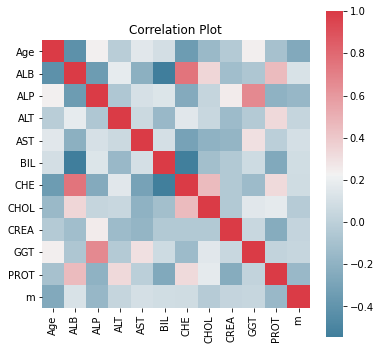

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot")
sns.heatmap(corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            ax=ax)
plt.show()

In [ ]:
target_corr = pd.concat([X, y], axis=1).corr()['category']
target_corr

Age         0.495877
ALB        -0.706416
ALP         0.357904
ALT        -0.059218
AST         0.208790
BIL         0.388040
CHE        -0.716708
CHOL       -0.385596
CREA        0.207934
GGT         0.146027
PROT       -0.289355
m          -0.146990
category    1.000000
Name: category, dtype: float64